In [0]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


 Predict with pre-trained YOLO models
==========================================
 import some necessary libraries:



In [ ]:
!pip install gluoncv
!pip install mxnet

In [0]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

Load a pretrained model
-------------------------


In [0]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)
net.reset_class(classes=['person'], reuse_weights=['person'])

Model file is not found. Downloading.


223070KB [00:08, 27604.53KB/s]                            


Pre-process an image
--------------------



In [0]:
im_fname = '/content/gdrive/My Drive/colab/data/image/3727139.jpg'
#im_fname = '/content/gdrive/My Drive/colab/data/image/test.jpg'
x, img = data.transforms.presets.yolo.load_test(im_fname, short=640)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 640, 640)


Inference and display
---------------------




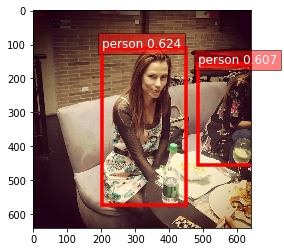

In [0]:
class_IDs, scores, bounding_boxes = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

Using the bounding box default in the database

In [0]:
print(bounding_boxes[0])


[[203.39484  110.69119  450.09406  571.73755 ]
 [485.4664   158.35632  647.3955   456.2119  ]
 [ 81.800674 157.95625  583.6378   631.4547  ]
 [544.4484   490.02466  643.0726   637.8782  ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.      

In [0]:
def getBox(class_IDs, scores, bounding_boxes):
    cid = int(class_IDs[0][0].asnumpy())
    cname = net.classes[cid]
    score = float(scores[0][0].asnumpy())
    x1,y1,x2,y2 = bbox =  bounding_boxes[0][0].astype(int).asnumpy()
        
    return bbox
box = getBox(class_IDs, scores, bounding_boxes)
print(box)   

[203 110 450 571]


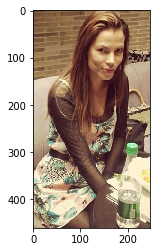

In [0]:
from PIL import Image
im = Image.open(im_fname)
cropped = im.crop((x1,y1,x2,y2))
plt.imshow(cropped)
cropped.save('/content/gdrive/My Drive/colab/data/image/3727139_YOLO.jpg')
im.close()
cropped.close()

Original crop in dataset

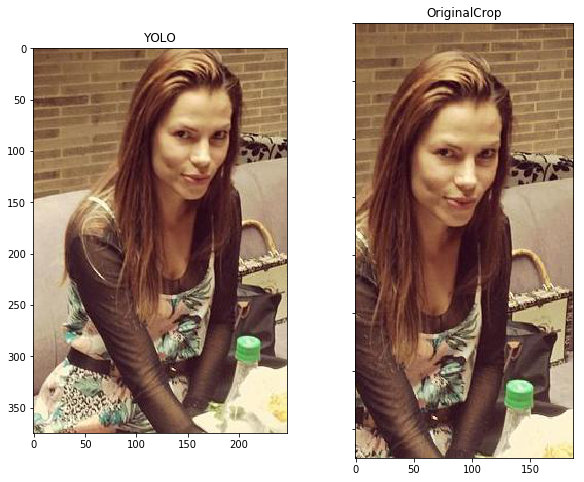

In [0]:
im_fname_crop = '/content/gdrive/My Drive/colab/data/image/3727139_cropped.jpg'
im_fname_YOLO = '/content/gdrive/My Drive/colab/data/image/3727139_YOLO.jpg'
fig, axs = plt.subplots(nrows=1, ncols = 2,sharey=True, figsize=(10, 8))
axs[0].set_title('YOLO')
img=Image.open(im_fname_YOLO)
axs[0].imshow(img)

axs[1].set_title('OriginalCrop')
img=Image.open(im_fname_crop)
axs[1].imshow(img)
plt.show()


Multi-person detections

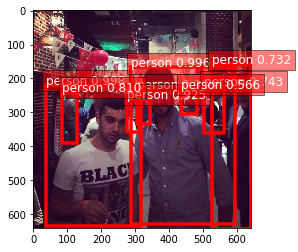

In [0]:
im_fname = '/content/gdrive/My Drive/colab/data/image/test.jpg'
x, img = data.transforms.presets.yolo.load_test(im_fname, short=640)
class_IDs, scores, bounding_boxes = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

some box's predicted coordinates are also out of range, because it thought the figure is not completed(see the right one).

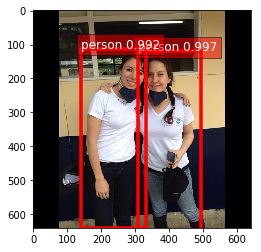

In [0]:
im_fname = '/content/gdrive/My Drive/colab/data/image/test1.jpg'
x, img = data.transforms.presets.yolo.load_test(im_fname, short=640)
class_IDs, scores, bounding_boxes = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()